In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-nonlineqn-nlsq)=
# Nonlinear least squares

After the solution of square linear systems, we generalized to the case of having more constraints to satisfy than available variables. Our next step is to do the same for nonlinear equations, thus filling out this table:

|                    | **linear** | **nonlinear** |
|:---------------:|:---------:|:--------------:|
| **square**         | $\mathbf{A}\mathbf{x}=\mathbf{b}$ |$\mathbf{f}(\mathbf{x})=\boldsymbol{0}$ |
| **overdetermined** | $\min\, \bigl\|\mathbf{A}\mathbf{x} - \mathbf{b}\bigr\|_2$ | $\min\, \bigl\|\mathbf{f}(\mathbf{x}) \bigr\|_2$ |

```{index} ! nonlinear least squares
```

```{proof:definition} Nonlinear least-squares problem
Given a function $\mathbf{f}(\mathbf{x})$ mapping from $\real^n$ to $\real^m$, the **nonlinear least-squares problem** is to find $\mathbf{x}\in\real^n$ such that $\bigl\|\mathbf{f}(\mathbf{x})\bigr\|_2$ is minimized.
```

As in the linear case, we consider only overdetermined problems, where $m>n$. Minimizing a positive quantity is equivalent to minimizing its square, so we could also define the result as minimizing $\phi(\mathbf{x})=\mathbf{f}(\mathbf{x})^T\mathbf{f}(\mathbf{x})$.

## Gauss–Newton method

You should not be surprised to learn that we can formulate an algorithm by substituting a linear model function for $\mathbf{f}$. At a current estimate $\mathbf{x}_k$ we define

```{math}
  \mathbf{q}(\mathbf{x})  = \mathbf{f}(\mathbf{x}_k) + \mathbf{A}_k(\mathbf{x}-\mathbf{x}_k),
```

where $\mathbf{A}_k$ is the exact $m\times n$ Jacobian matrix, $\mathbf{J}(\mathbf{x}_k)$, or an approximation of it as described in {numref}`section-nonlineqn-quasinewton`.

In the square case, we solved $\mathbf{q}=\boldsymbol{0}$ to define the new value for $\mathbf{x}$, leading to the condition $\mathbf{A}_k\mathbf{s}_k=-\mathbf{f}_k$, where  $\mathbf{s}_k=\mathbf{x}_{k+1}-\mathbf{x}_k$. Now, with $m>n$, we cannot expect to solve $\mathbf{q}=\boldsymbol{0}$, so instead we define $\mathbf{x}_{k+1}$ as the value that minimizes $\| \mathbf{q} \|_2$.

```{index} ! Gauss–Newton method
```

(algorithm-nlsq-gaussnewton)=
::::{proof:algorithm} Gauss–Newton method
Given $\mathbf{f}$ and a starting value $\mathbf{x}_1$, for each $k=1,2,3,\ldots$

1. Compute $\mathbf{y}_k = \mathbf{f}(\mathbf{x}_k)$ and $\mathbf{A}_k$, the exact or approximate Jacobian matrix at $\mathbf{x}_k$.
2. Solve the linear least squares problem $\argmin \| \mathbf{A}_k\mathbf{s}_k  + \mathbf{y}_k\|_2$ for $\mathbf{s}_k$.
3. Let $\mathbf{x}_{k+1} = \mathbf{x}_k + \mathbf{s}_k$.
::::

In brief, Gauss–Newton solves a series of linear least-squares problems in order to solve a nonlinear least-squares problem.

Surprisingly, {numref}`Function {number} <function-newtonsys>` and {numref}`Function {number} <function-levenberg>`, which were introduced for the case of $m=n$ nonlinear equations, work *without modification* as the Gauss–Newton method for the overdetermined case! The reason is that the backslash operator applies equally well to the linear system and linear least-squares problems, and nothing else in those functions was written with explicit reference to $n$.

## Convergence

In the multidimensional Newton method for a nonlinear system, we expect quadratic convergence to a solution in the typical case. For the Gauss–Newton method, the picture is more complicated. 

As always in least-squares problems, the residual $\mathbf{f}(\mathbf{x})$ will not necessarily be zero when $\|\mathbf{f}\|$ is minimized. Suppose that the minimum value of $\|\mathbf{f}\|$ is $R>0$. In general, we might observe quadratic-like convergence until the iterate $\|\mathbf{x}_k\|$ is within distance $R$ of a true minimizer, and linear convergence thereafter. When $R$ is not sufficiently small, the convergence can be quite slow.

(demo-nlsq-converge)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We will observe the convergence of {numref}`Function {number} <function-levenberg>` for different levels of the minimum least-squares residual. We start with a function mapping from $\real^2$ into $\real^3$, and a point that will be near the optimum.

In [2]:
g(x) = [sin(x[1]+x[2]),cos(x[1]-x[2]),exp(x[1]-x[2])]
p = [1,1];

```{index} ! Julia; @sprintf
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
The function $\mathbf{g}(\mathbf{x}) - \mathbf{g}(\mathbf{p})$ obviously has a zero residual at $\mathbf{p}$. We'll make different perturbations of that function in order to create nonzero residuals.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
`@sprintf` is a way to format numerical values as strings, patterned after the C function `printf`. 
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

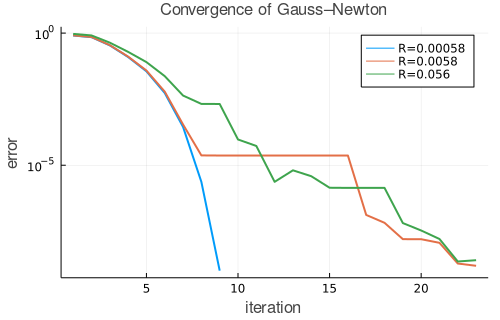

In [3]:
plt = plot(xlabel="iteration",yaxis=(:log10,"error"),
    title="Convergence of Gauss–Newton")
for R in [1e-3,1e-2,1e-1]
    # Define the perturbed function.
    f(x) = g(x) - g(p) + R*normalize([-1,1,-1])
    x = FNC.levenberg(f,[0,0])
    r = x[end]
    err = [norm(x-r) for x in x[1:end-1]]
    normres = norm(f(r))
    plot!(err,label=@sprintf("R=%.2g",normres))
end
plt

In the least perturbed case, where the minimized residual is less than $10^{-3}$, the convergence is plausibly quadratic. At the next level up, the convergence starts similarly but suddenly stagnates for a long time. In the most perturbed case, the quadratic phase is nearly gone and the overall shape looks linear.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Nonlinear data fitting

```{index} data fitting; nonlinear
```

In {numref}`section-leastsq-fitting` we saw how to fit functions to data values, provided that the set of candidate fitting functions depends linearly on the undetermined coefficients. We now have a tool to generalize that process to fitting functions that depend nonlinearly on unknown parameters. 

Suppose that $(t_i,y_i)$ for $i=1,\ldots,m$ are given points. We wish to model the data by a function $g(t,\mathbf{x})$ that depends on unknown parameters $x_1,\ldots,x_n$ in an arbitrary way. A standard approach is to minimize the discrepancy between the model and the observations, in a least-squares sense. Define 

```{math}
:label: nlsq-misfit
\mathbf{f}(\mathbf{x}) = \left[\, g(t_i,\mathbf{x})-y_i  \, \right]_{\,i=1,\ldots,m}.
```

We call $\mathbf{f}$ a **misfit** function. By minimizing $\bigl\| \mathbf{f}(\mathbf{c}) \bigr\|^2$, we get the best possible fit to the data. If an explicit Jacobian matrix is desired for the minimization, we can compute

```{math}
\mathbf{f}\,'(\mathbf{x}) = \left[ \frac{\partial}{\partial x_j} g(t_i,\mathbf{x}) \right]_{\,i=1,\ldots,m;\,j=1,\ldots,n.}
```

The form of $g$ is up to the modeler. There may be compelling theoretical choices, or you may just be looking for enough algebraic power to express the data well. Naturally, in the special case where the dependence on $\mathbf{c}$ is linear, i.e.,

```{math}
  g(t,\mathbf{c}) = c_1 g_1(t) + c_2 g_2(t) + \cdots + c_m g_m(t),
```

then the misfit function is also linear in $\mathbf{c}$ and the fitting problem reduces to linear least squares.

(demo-nlsq-MM)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Inhibited enzyme reactions often follow what are known as _Michaelis–Menten_ kinetics, in which a reaction rate $w$ follows a law of the form

$$w(s) = \frac{V s}{K_m + s},$$ 

where $s$ is the concentration of a substrate. The real values $V$ and $K_m$ are parameters that are free to fit to data. For this example, we cook up some artificial data with $V=2$ and $K_m=1/2$.

In [4]:
m = 25;
s = range(0.05,6,length=m)
ŵ = @. 2*s/(0.5+s)                      # exactly on the curve
w = @. ŵ + 0.15*cos(2*exp(s/16)*s);     # smooth noise added

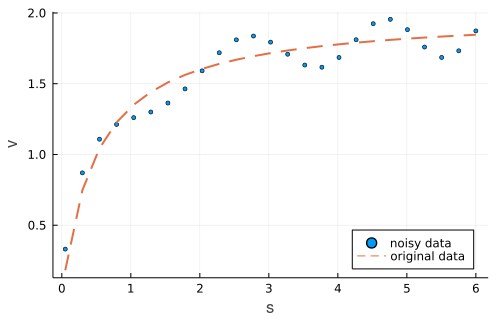

In [5]:
scatter(s,w,label="noisy data",
    xlabel="s",ylabel="v",leg=:bottomright)
plot!(s,ŵ,l=:dash,label="original data")

```{index} ! Julia; destructuring
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
The idea is to pretend that we know nothing of the origins of this data and use nonlinear least squares to find the parameters in the theoretical model function $v(s)$. In {eq}`nlsq-misfit`, the $s$ variable plays the role of $t$, and $v$ plays the role of $g$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Putting comma-separated values on the left of an assignment will **destructure** the right-hand side, drawing individual assignments from entries of a vector, for example.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [6]:
function misfit(x)
    V,Km = x   # rename components for clarity
    return @. V*s/(Km+s) - w
end

misfit (generic function with 1 method)

In the Jacobian the derivatives are with respect to the parameters in $\mathbf{x}$.

In [7]:
function misfitjac(x)
    V,Km = x   # rename components for clarity
    J = zeros(m,2)
    J[:,1] = @. s/(Km+s)              # dw/dV
    J[:,2] = @. -V*s/(Km+s)^2         # dw/d_Km
    return J
end

misfitjac (generic function with 1 method)

In [8]:
x₁ = [1, 0.75]
x = FNC.newtonsys(misfit,misfitjac,x₁)

@show V,Km = x[end]  # final values

(V, Km) = x[end] = [1.96865259837822, 0.46930373074166293]


2-element Vector{Float64}:
 1.96865259837822
 0.46930373074166293

The final values are reasonably close to the values $V=2$, $K_m=0.5$ that we used to generate the noise-free data. Graphically, the model looks close to the original data.

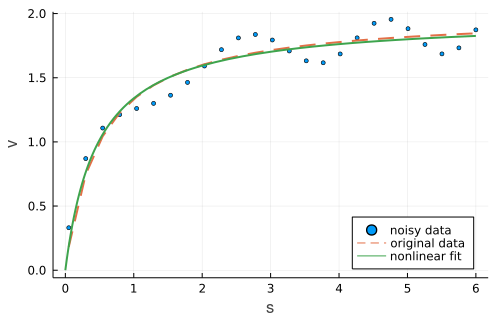

In [9]:
model = s -> V*s/(Km+s)
plot!(model,0,6,label="nonlinear fit" )

For this particular model, we also have the option of linearizing the fit process. Rewrite the model as $1/w = (\alpha/s)+\beta$ for the new parameters $\alpha=K_m/V$ and $\beta=1/V$. This corresponds to the misfit function whose entries are 

$$f_i([\alpha,\beta]) = \alpha \cdot \frac{1}{s_i} + \beta - \frac{1}{w_i}$$ 

for $i=1,\ldots,m$. Although this misfit is nonlinear in $s$ and $w$, it's linear in the unknown parameters $\alpha$ and $\beta$. This lets us pose and solve it as a linear least-squares problem.

In [10]:
A = [ s.^(-1) s.^0 ]
u = 1 ./ w
α,β = A\u

2-element Vector{Float64}:
 0.12476333709901535
 0.5713959100431232

The two fits are different because they do not optimize the same quantities.

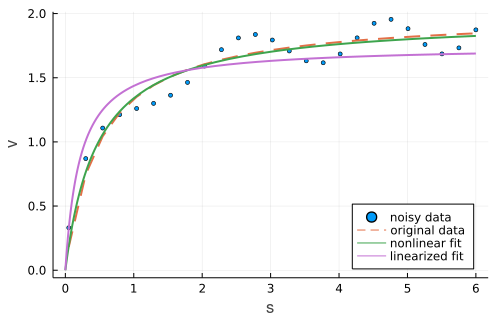

In [11]:
linmodel = x -> 1 / (β + α/x)
plot!(linmodel,0,6,label="linearized fit")

The truly nonlinear fit is clearly better in this case. It optimizes a residual for the original measured quantity rather than a transformed one we picked for algorithmic convenience.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

(problem-nlsq-onevar)=
1. ✍ Define $\mathbf{f}(x)=[ x-8, \; x^2-4 ]$.

    **(a)** Write out the linear model of $\mathbf{f}$ at $x=2$.

    **(b)** Find the estimate produced by one step of the Gauss–Newton method, starting at $x=2$.
  
2. ✍ (Continuation of Exercise 1.) The Gauss–Newton method replaces $\mathbf{f}(\mathbf{x})$ by a linear model and minimizes the norm of its residual. An alternative is to replace $\| \mathbf{f}(\mathbf{x}) \|_2^2$ by a scalar *quadratic* model $q(\mathbf{x})$ and minimize that.
  
    **(a)** Using $\mathbf{f}(x) = [ x-8, \; x^2-4 ]$, let $q(x)$ be defined by the first three terms in the Taylor series for $\| \mathbf{f}(x) \|_2^2$ at $x=2$.

    **(b)** Find the unique $x$ that minimizes $q(x)$. Is the result the same as the estimate produced by Gauss–Newton?
  
3. ⌨  A famous result by Kermack and McKendrick in 1927 {cite}`kermackContributionMathematical1927` suggests that in epidemics that kill only a small fraction of a susceptible population, the death rate as a function of time is well modeled by

    ```{math}
    w'(t) = A \operatorname{sech}^2[B(t-C)]
    ```
  
    for constant values of the parameters $A,B,C$. Since the maximum of sech is $\operatorname{sech}(0)=1$, $A$ is the maximum death rate and $C$ is the time of peak deaths. You will use this model to fit the deaths per week from plague recorded in Mumbai 
    during 1906:

    ``` julia
    5, 10, 17, 22, 30, 50, 51, 90, 120, 180, 292, 395, 445, 775, 780,
    700, 698, 880, 925, 800, 578, 400, 350, 202, 105, 65, 55, 40, 30, 20
    ```

    **(a)** Use {numref}`Function {number} <function-levenberg>` to find the best least-squares fit to the data using the $\operatorname{sech}^2$ model. Make a plot of the model fit superimposed on the data. 

    **(b)** Repeat part (a) using only the first 15 data values.

4. ⌨  (Variation on [Exercise 4.5.6](problem-newtonsys-circlefit).) Suppose the points $(x_i,y_i)$ for $i=1,\ldots,m$ are given, and the goal is to find the circle with center $(a,b)$ and radius $r$ that best fits the points. Define 
    
    $$f_i(a,b,r) = (a-x_i)^2 + (b-y_i)^2 - r^2, \qquad i=1,\ldots,m.$$ 
    
    Then we can define the best circle as the one that minimizes $\|\mathbf{f}\|$.  

    Define data points as follows:

    ``` julia
    m = 30; t = 2π*rand(m);
    x = @. -2 + 5*cos(t); y = @. 1 + 5*sin(t);
    x += 0.2*randn(m); y += 0.2*randn(m);
    ```
    
    Use {numref}`Function {number} <function-levenberg>` to find the best-fit circle, and make a plot of the circle superimposed on the points.

5. ⌨ The position of the upper lid during an eye blink can be measured from high-speed video {cite}`wuEffectsMild2014`, and it may be possible to classify blinks based in part on fits to the lid position {cite}`broschBlinkCharacterization2017`. The lid position functions proposed to fit blinks is a product of a monomial or polynomial multiplying a decaying exponential {cite}`berkeKineticsLid1998`.  In this problem, you will generate representative data, add a small amount of noise to it, and then perform nonlinear least-squares fits to the data.

   **(a)** Consider the function $y(\mathbf{a}) = a_1 t^2 \exp \left( -a_2 t^{a_3} \right)$, using the vector of coefficients $\mathbf{a} = [a_1,a_2,a_3]$, and create synthetic eyelid position data as follows:

    ``` julia
    N = 20;                            # number of time values
    t = (1:N)/N;                       # equally spaced to t=1
    a = [10, 10, 2];                   # baseline values
    y = @. a(1)*t^2*exp(-a(2)*t^a(3)); # ideal data
    ym = copy(y);                      # vector for data
    ir = 1:N-1;                        # range to add noise
    noise = 0.03;                      # amplitude of noise
    ym[ir] += noise*rand(N-1);         # add noise
    ```

    **(b)** Using the data `(t,ym)`, find the nonlinear least-squares fit using {numref}`Function {number} <function-levenberg>`.

    **(c)** Plot the fits using `np = 100` points over `t=(1:np)/np` together with symbols for the `N` measured data points `ym`.

    **(d)** Increase the noise to 5% and 10%. You may have to increase the number of measured points `N` and/or the maximum number of iterations.  How close are the coefficients?  Plot the data and the resulting fit for each case.

6. ⌨ Repeat the previous problem using the fitting function $y(\mathbf{a}) = (a_1+a_2 t + a_3 t^2) t^2 \exp \left( -a_4 t^{a_5} \right)$, using the vector of coefficients $\mathbf{a} = [a_1,\ldots,a_5]$. (This was the choice used in Brosch et al {cite}`broschBlinkCharacterization2017`.)  Use `a = [20, -10, -8, 7, 2]` to create the data and as an initial guess for the coefficients for the fit to the noisy data.